In [2]:
import pandas as pd
running_data = pd.read_csv("C:/Users/himan/OneDrive/Documents/RedbackOperations/redback-fit-sports-performance/Running_Archive/Fixed_cleaned_activities.csv")

In [3]:
# Display the first few rows of the run activities DataFrame
print(running_data.head())

   Activity ID Activity Type   Begin Timestamp     End Timestamp  \
0   2284658991       Running   4/11/2017 12:07   4/11/2017 13:06   
1   2284658936       Running    3/11/2017 9:47   3/11/2017 10:35   
2   2228102647       Running  25/10/2017 16:31  25/10/2017 17:11   
3   2104984694       Running  13/10/2017 11:53  13/10/2017 12:41   
4   2084195352       Running   2/10/2017 14:51   2/10/2017 15:38   

   Max. Elevation (Raw)  Min. Elevation (Raw)  Elevation Gain (Raw)  \
0                 472.6            240.800003                 315.0   
1                 473.2            241.800003                 245.0   
2                 278.8            186.399994                 208.0   
3                 471.6            239.399994                 246.0   
4                 494.6            263.600006                 246.0   

   Elevation Loss (Raw)  Average Heart Rate (bpm)  Min. Heart Rate (bpm)  ...  \
0                 314.0                     182.0                  113.0  ...   
1 

In [4]:
# Print dimensions of running data before removing null values
print("Dimensions of running data before removing null values:", running_data.shape)

Dimensions of running data before removing null values: (155, 33)


In [5]:
# Check for null values in each column
null_counts = running_data.isnull().sum()

# Display the count of null values in each column
print(null_counts)

Activity ID                               0
Activity Type                             0
Begin Timestamp                           0
End Timestamp                             0
Max. Elevation (Raw)                      0
Min. Elevation (Raw)                      0
Elevation Gain (Raw)                      0
Elevation Loss (Raw)                      0
Average Heart Rate (bpm)                  0
Min. Heart Rate (bpm)                     0
Average Moving Speed                      0
Average Speed                             0
Max. Speed                                0
Distance (Raw)                            0
Duration (h:m:s)                          0
Moving Duration (h:m:s)                   0
Calories                                  0
Device                                    0
Begin Latitude (Decimal Degrees Raw)      0
Begin Longitude (Decimal Degrees Raw)     0
End Latitude (Decimal Degrees Raw)        0
End Longitude (Decimal Degrees Raw)       0
Temperature (Raw)               

In [6]:
# Fill missing values in 'GPX Min Heart Rate' with the most frequent value (mode)
most_frequent_value = running_data['GPX Min Heart Rate'].mode()[0]  # Get the most frequent value (mode)
running_data['GPX Min Heart Rate'].fillna(most_frequent_value, inplace=True)

# Check if there are still any missing values
print(running_data['GPX Min Heart Rate'].isnull().sum())

0


In [7]:
print(running_data.dtypes)

Activity ID                                int64
Activity Type                             object
Begin Timestamp                           object
End Timestamp                             object
Max. Elevation (Raw)                     float64
Min. Elevation (Raw)                     float64
Elevation Gain (Raw)                     float64
Elevation Loss (Raw)                     float64
Average Heart Rate (bpm)                 float64
Min. Heart Rate (bpm)                    float64
Average Moving Speed                     float64
Average Speed                            float64
Max. Speed                               float64
Distance (Raw)                           float64
Duration (h:m:s)                          object
Moving Duration (h:m:s)                   object
Calories                                   int64
Device                                    object
Begin Latitude (Decimal Degrees Raw)     float64
Begin Longitude (Decimal Degrees Raw)    float64
End Latitude (Decima

In [8]:
import pandas as pd

# Assuming df is your DataFrame
running_data['Begin Timestamp'] = pd.to_datetime(running_data['Begin Timestamp'], format='%d/%m/%Y %H:%M')
running_data['End Timestamp'] = pd.to_datetime(running_data['End Timestamp'], format='%d/%m/%Y %H:%M')


In [9]:
running_data['Duration'] = running_data['End Timestamp'] -running_data['Begin Timestamp']


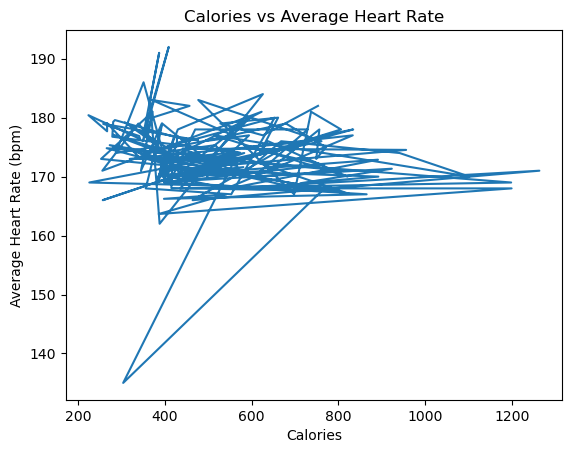

In [10]:
import matplotlib.pyplot as plt
plt.plot(running_data['Calories'], running_data['Average Heart Rate (bpm)'])
plt.xlabel('Calories')
plt.ylabel('Average Heart Rate (bpm)')
plt.title('Calories vs Average Heart Rate')
plt.show()


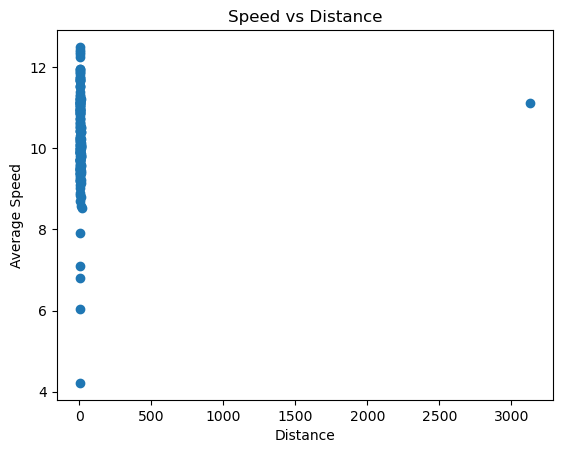

In [11]:
plt.scatter(running_data['Distance (Raw)'], running_data['Average Speed'])
plt.xlabel('Distance')
plt.ylabel('Average Speed')
plt.title('Speed vs Distance')
plt.show()


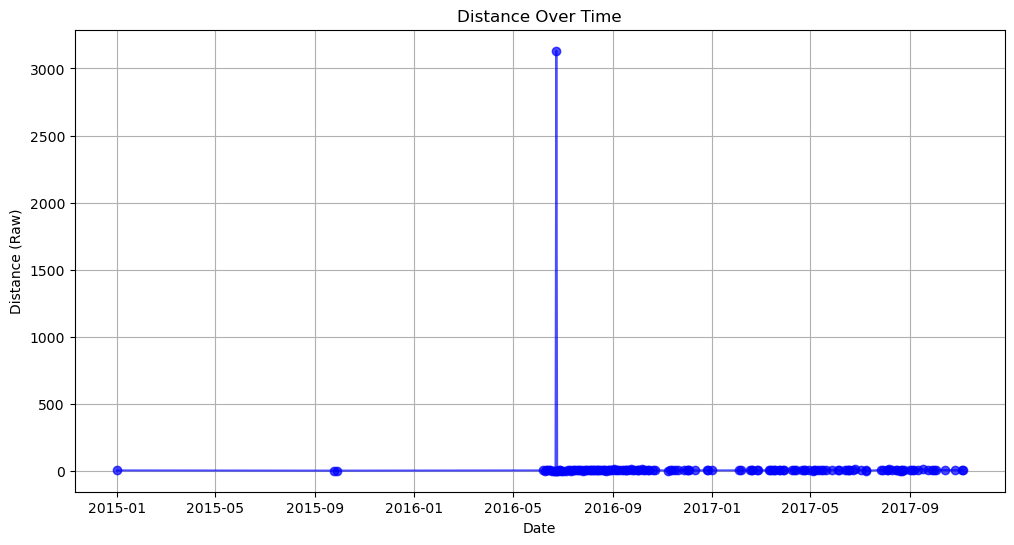

In [12]:
# Set the 'Begin Timestamp' as the index
running_data.set_index('Begin Timestamp', inplace=True)

# Plot Distance Over Time
plt.figure(figsize=(12, 6))
plt.plot(running_data.index, running_data['Distance (Raw)'], marker='o', linestyle='-', color='b', alpha=0.7)
plt.title('Distance Over Time')
plt.xlabel('Date')
plt.ylabel('Distance (Raw)')
plt.grid(True)
plt.show()

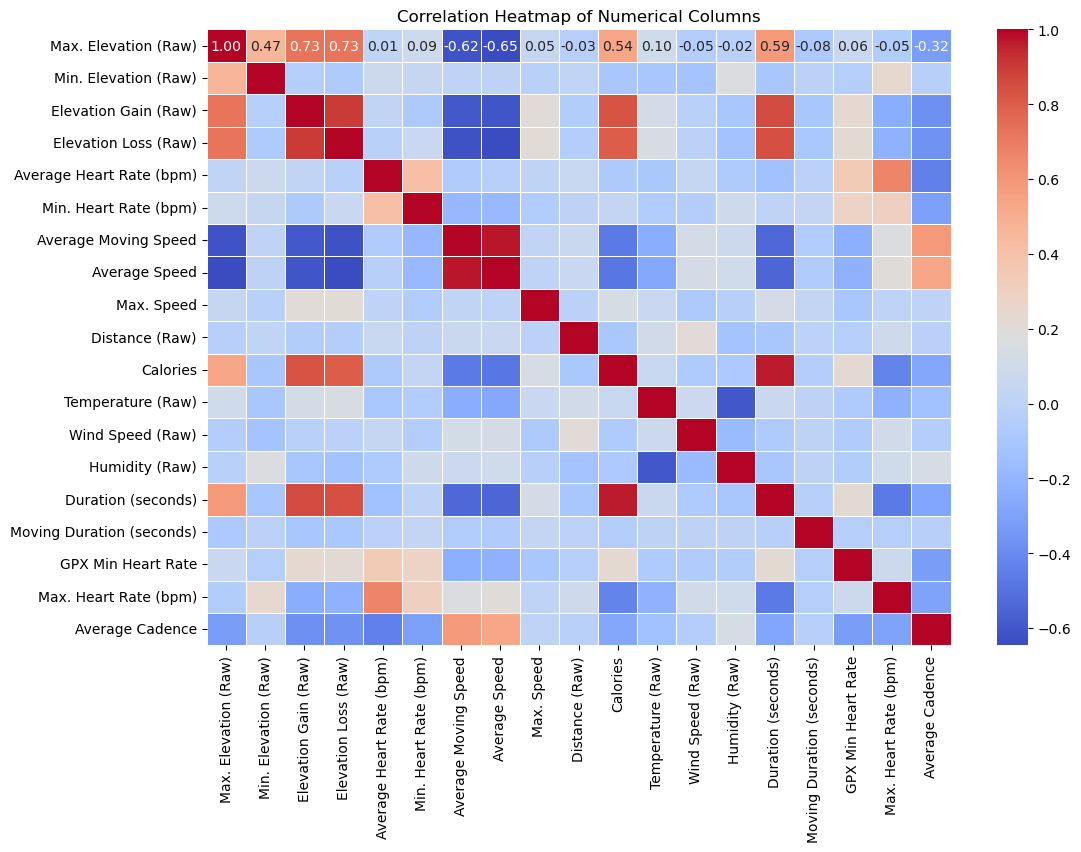

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = [
    'Max. Elevation (Raw)', 'Min. Elevation (Raw)', 'Elevation Gain (Raw)',
    'Elevation Loss (Raw)', 'Average Heart Rate (bpm)', 'Min. Heart Rate (bpm)', 
    'Average Moving Speed', 'Average Speed', 'Max. Speed', 'Distance (Raw)', 
    'Calories', 'Temperature (Raw)', 'Wind Speed (Raw)', 'Humidity (Raw)',
    'Duration (seconds)', 'Moving Duration (seconds)', 'GPX Min Heart Rate', 
    'Max. Heart Rate (bpm)', 'Average Cadence'
]

# Calculate the correlation matrix for the numerical columns
corr_matrix = running_data[numerical_columns].corr()

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Corrected column names
X = running_data[['Wind Speed (Raw)', 'Average Heart Rate (bpm)', 'Elevation Gain (Raw)', 'Temperature (Raw)', 'Calories', 'Average Speed', 'Distance (Raw)']]
y = pd.to_timedelta(running_data['Moving Duration (h:m:s)']).dt.total_seconds()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for regression models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Optionally, inspect the coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 1089332647.511361
R^2 Score: -661.3795305049827
Coefficients: [  5608.7165673     774.91818099 -62548.6739211   -5057.22360226
  24959.9452073  -38378.8216887    -954.63761173]
Intercept: 19284.177419354874


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
# Create a Decision Tree regression model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
y_tree_pred = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_tree_pred)
r2_tree = r2_score(y_test, y_tree_pred)
mae_tree = mean_absolute_error(y_test, y_tree_pred)
rmse_tree = np.sqrt(mse_tree)

print(f'Decision Tree - Mean Squared Error: {mse_tree}')
print(f'Decision Tree - R^2 Score: {r2_tree}')
print(f'Decision Tree - Mean Absolute Error: {mae_tree}')
print(f'Decision Tree - RMSE Score: {rmse_tree}')


Decision Tree - Mean Squared Error: 1825042.8709677418
Decision Tree - R^2 Score: -0.10973543553000975
Decision Tree - Mean Absolute Error: 469.4516129032258
Decision Tree - RMSE Score: 1350.9414757744844


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)
mae_rf = mean_absolute_error(y_test, y_rf_pred)
rmse_rf = np.sqrt(mse_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - Root Mean Squared Error: {rmse_rf}')
print(f'Random Forest - Mean Absolute Error: {mae_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')

Random Forest - Mean Squared Error: 15043911712.278671
Random Forest - Root Mean Squared Error: 122653.62494552972
Random Forest - Mean Absolute Error: 36775.32290322582
Random Forest - R^2 Score: -9146.599862817506


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_gb_pred = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_gb_pred)
r2_gb = r2_score(y_test, y_gb_pred)
mae_gb = mean_absolute_error(y_test, y_gb_pred)
rmse_gb = np.sqrt(mse_gb)

# Print the evaluation metrics
print(f'Gradient Boosting - Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting - R^2 Score: {r2_gb}')
print(f'Gradient Boosting - Mean Absolute Error: {mae_gb}')
print(f'Gradient Boosting - RMSE: {rmse_gb}')



Gradient Boosting - Mean Squared Error: 9727315116.975794
Gradient Boosting - R^2 Score: -5913.790523332084
Gradient Boosting - Mean Absolute Error: 25470.348095445257
Gradient Boosting - RMSE: 98627.15202709544


In [18]:
from sklearn.svm import SVR

# Create a Support Vector regression model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
y_svr_pred = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_svr_pred)
r2_svr = r2_score(y_test, y_svr_pred)
mae_svr = mean_absolute_error(y_test, y_svr_pred)
rmse_svr = np.sqrt(mse_svr)

print(f'Support Vector Regression - Mean Squared Error: {mse_svr}')
print(f'Support Vector Regression - Root Mean Squared Error: {rmse_svr}')
print(f'Support Vector Regression - Mean Absolute Error: {mae_svr}')
print(f'Support Vector Regression - R^2 Score: {r2_svr}')

Support Vector Regression - Mean Squared Error: 1633511.035243211
Support Vector Regression - Root Mean Squared Error: 1278.0888213434976
Support Vector Regression - Mean Absolute Error: 895.0584265030035
Support Vector Regression - R^2 Score: 0.006727398585727351


In [19]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_knn_pred = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_knn_pred)
r2_knn = r2_score(y_test, y_knn_pred)
mae_knn = mean_absolute_error(y_test, y_knn_pred)
rmse_knn = np.sqrt(mse_knn)

print(f'KNN Regression - Mean Squared Error: {mse_knn}')
print(f'KNN Regression - Root Mean Squared Error: {rmse_knn}')
print(f'KNN Regression - Mean Absolute Error: {mae_knn}')
print(f'KNN Regression - R^2 Score: {r2_knn}')


KNN Regression - Mean Squared Error: 303282.9109677419
KNN Regression - Root Mean Squared Error: 550.7112773202869
KNN Regression - Mean Absolute Error: 370.29677419354834
KNN Regression - R^2 Score: 0.8155858151906695


In [20]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions
y_lasso_pred = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)
mae_lasso = mean_absolute_error(y_test, y_lasso_pred)
rmse_lasso = np.sqrt(mse_lasso)

print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')
print(f'Lasso Regression - Root Mean Squared Error: {rmse_lasso}')
print(f'Lasso Regression - Mean Absolute Error: {mae_lasso}')
print(f'Lasso Regression - R^2 Score: {r2_lasso}')


Lasso Regression - Mean Squared Error: 1089315594.80972
Lasso Regression - Root Mean Squared Error: 33004.78139315151
Lasso Regression - Mean Absolute Error: 24438.429774796245
Lasso Regression - R^2 Score: -661.3691614404619


In [21]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions
y_ridge_pred = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)
mae_ridge = mean_absolute_error(y_test, y_ridge_pred)
rmse_ridge = np.sqrt(mse_ridge)

print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression - Root Mean Squared Error: {rmse_ridge}')
print(f'Ridge Regression - Mean Absolute Error: {mae_ridge}')
print(f'Ridge Regression - R^2 Score: {r2_ridge}')


Ridge Regression - Mean Squared Error: 1083914241.4141529
Ridge Regression - Root Mean Squared Error: 32922.8528747761
Ridge Regression - Mean Absolute Error: 24375.707434619482
Ridge Regression - R^2 Score: -658.0848148871653


In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


# Create an Elastic Net model
elastic_net_model = ElasticNet(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 10.0],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]  # Mix between L1 and L2 (0 = Ridge, 1 = Lasso)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_en_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions with the best model
y_pred = best_en_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"Elastic Net Regression - Mean Squared Error: {mse}")
print(f"Elastic Net Regression - R^2 Score: {r2}")
print(f"Elastic Net Regression - Mean Absolute Error: {mae}")
print(f"Elastic Net Regression - RMSE: {rmse}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'alpha': 10.0, 'l1_ratio': 0.1}
Elastic Net Regression - Mean Squared Error: 292303983.06587636
Elastic Net Regression - R^2 Score: -176.73833870694887
Elastic Net Regression - Mean Absolute Error: 16696.402545417444
Elastic Net Regression - RMSE: 17096.89980861666


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Create a Gradient Boosting regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_gb_pred = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_gb_pred)
r2_gb = r2_score(y_test, y_gb_pred)
mae_gb = mean_absolute_error(y_test, y_gb_pred)
rmse_gb = np.sqrt(mse_gb)

# Print the evaluation metrics
print(f'Gradient Boosting - Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting - R^2 Score: {r2_gb}')
print(f'Gradient Boosting - Mean Absolute Error: {mae_gb}')
print(f'Gradient Boosting - RMSE Score: {rmse_gb}')


Gradient Boosting - Mean Squared Error: 12070235157.161226
Gradient Boosting - R^2 Score: -7338.4263127524655
Gradient Boosting - Mean Absolute Error: 28337.431435278788
Gradient Boosting - RMSE Score: 109864.62195429986


In [25]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Refit the model with best parameters
rf_model_tuned = grid_search.best_estimator_

# Make predictions and evaluate
y_rf_pred_tuned = rf_model_tuned.predict(X_test)

mse_rf_tuned = mean_squared_error(y_test, y_rf_pred_tuned)
r2_rf_tuned = r2_score(y_test, y_rf_pred_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_rf_pred_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)

print(f'Random Forest (Tuned) - Mean Squared Error: {mse_rf_tuned}')
print(f'Random Forest (Tuned) - R^2 Score: {r2_rf_tuned}')
print(f'Random Forest (Tuned) - Mean Absolute Error: {mae_rf_tuned}')
print(f'Random Forest (Tuned) - RMSE: {rmse_rf_tuned}')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Random Forest (Tuned) - Mean Squared Error: 9602070712.318546
Random Forest (Tuned) - R^2 Score: -5837.634419735292
Random Forest (Tuned) - Mean Absolute Error: 34741.21966222772
Random Forest (Tuned) - RMSE: 97990.15620111312


In [26]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model_tuned, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean of the cross-validated scores
cv_mse = -cv_scores.mean()
print(f'Cross-validated MSE: {cv_mse}')


Cross-validated MSE: 39600677649.92384


In [27]:
# Get feature importances from the tuned Random Forest model
importances = rf_model_tuned.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Print top 10 most important features
for idx in sorted_indices[:10]:
    print(f"Feature {idx}, Importance: {importances[idx]}")


Feature 2, Importance: 0.6639838646538602
Feature 4, Importance: 0.20229224261072518
Feature 6, Importance: 0.11463728306192351
Feature 1, Importance: 0.015368327565548347
Feature 5, Importance: 0.003449831335955461
Feature 3, Importance: 0.00016351413477874697
Feature 0, Importance: 0.00010493663720848097


In [31]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Create a Huber Regressor model
huber_model = HuberRegressor()

# Train the model
huber_model.fit(X_train, y_train)

# Make predictions
y_pred = huber_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"Huber Regression - Mean Squared Error: {mse}")
print(f"Huber Regression - R^2 Score: {r2}")
print(f"Huber Regression - Mean Absolute Error: {mae}")
print(f"Huber Regression - RMSE: {rmse}")


Huber Regression - Mean Squared Error: 95966.26560149954
Huber Regression - R^2 Score: 0.9416467595103682
Huber Regression - Mean Absolute Error: 202.19289985055747
Huber Regression - RMSE: 309.78422426182317


c:\Users\himan\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
